In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading the data set

df = pd.read_csv('/content/car_age_price.csv')
df

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [3]:
df.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [4]:
df.shape


(112, 2)

In [6]:
#describing the data set
df.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [7]:
#checking missing values

df.isnull().sum()

Year     0
Price    0
dtype: int64

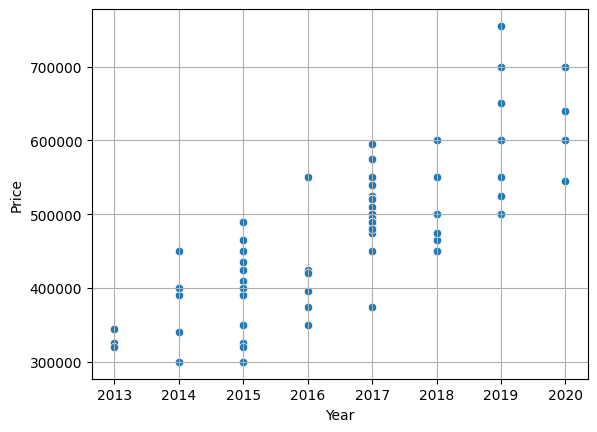

In [9]:
#Visualize the relationship between the year of the car and its price

sns.scatterplot(x='Year', y='Price', data=df)
plt.grid(True)
plt.show()

In [18]:
# data preparation for modelling

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


#split the data set into training and testing set


X = df[['Year']]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


# train the linear regression model

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# train the lasso regression model

from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha= 0.1)
lasso_model = lasso_model.fit(X_train, y_train)

# make predictions

y_pred_linear = linear_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)

# evaluating the models

mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_lasso =  mean_squared_error(y_test, y_pred_lasso)

r2_linear = r2_score(y_test, y_pred_linear)
r2_lasso = r2_score(y_test, y_pred_lasso)

mse_linear, r2_linear, mse_lasso, r2_lasso


(4326906256.829671, 0.36759313425902185, 4326901608.19506, 0.36759381368868127)

In [25]:
# Predict the price of a 2022 model
year_2022 = pd.DataFrame({'Year': [2022]})
predicted_price_2022 = lasso_model.predict(year_2022)

predicted_price_2022[0]


743601.3917776793